# Anscombe's Quartet

The raw data has four series. The correlation coefficients are high.
Visualization shows that a simple linear regression model is misleading.

## Raw Data for the Series

In [1]:
import json
from pathlib import Path
from pydantic import BaseModel

In [2]:
class Pair(BaseModel):
    x: float
    y: float

class Series(BaseModel):
    series: str
    data: list[Pair]

    @property
    def x(self) -> list[float]:
        return [p.x for p in self.data]
        
    @property
    def y(self) -> list[float]:
        return [p.y for p in self.data]

In [3]:
source = Path.cwd().parent.parent / "data" / "anscombe.json"
with source.open() as source_file:
    json_document = json.load(source_file)
    source_data = (Series.model_validate(s) for s in json_document)
    quartet = {s.series: s for s in source_data}

In [4]:
quartet['I']

Series(series='I', data=[Pair(x=10.0, y=8.04), Pair(x=8.0, y=6.95), Pair(x=13.0, y=7.58), Pair(x=9.0, y=8.81), Pair(x=11.0, y=8.33), Pair(x=14.0, y=9.96), Pair(x=6.0, y=7.24), Pair(x=4.0, y=4.26), Pair(x=12.0, y=10.84), Pair(x=7.0, y=4.82), Pair(x=5.0, y=5.68)])

In [6]:
quartet['IV']

Series(series='IV', data=[Pair(x=8.0, y=6.58), Pair(x=8.0, y=5.76), Pair(x=8.0, y=7.71), Pair(x=8.0, y=8.84), Pair(x=8.0, y=8.47), Pair(x=8.0, y=7.04), Pair(x=8.0, y=5.25), Pair(x=19.0, y=12.5), Pair(x=8.0, y=5.56), Pair(x=8.0, y=7.91), Pair(x=8.0, y=6.89)])

## Visualization of each series

In [7]:
from matplotlib import pyplot as plt

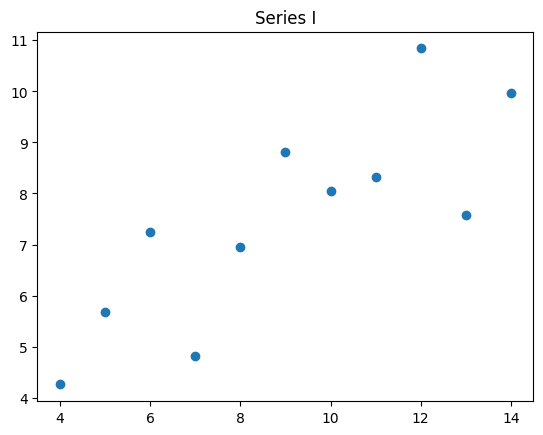

In [8]:
x = [p.x for p in quartet['I'].data]
y = [p.y for p in quartet['I'].data]
plt.scatter(x, y)
plt.title(f"Series {quartet['I'].series}")
plt.show()

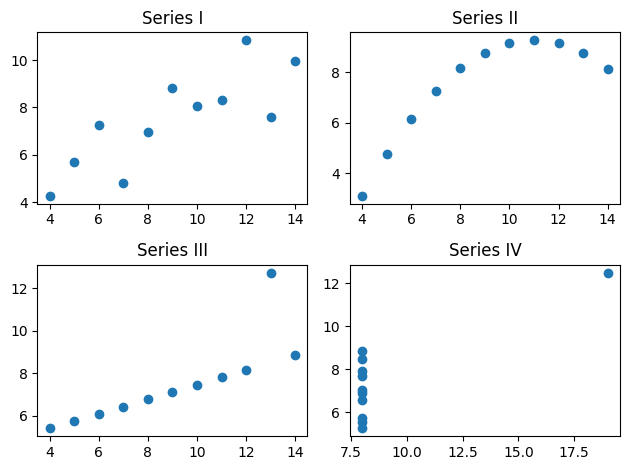

In [11]:
plt.figure(layout='tight')
for n, series in enumerate(quartet.values(), start=1):
    title = f"Series {series.series}"
    plt.subplot(2, 2, n)
    plt.scatter(series.x, series.y)
    plt.title(title)